This notebook will walk through the process needed to import CSV and excel files, filter data frames by row and column and plots the filtered data. 

In [29]:
import Pkg; 
using Pkg; 
Pkg.add(["CSV", "DataFrames", "XLSX", "Statistics", "Plots"])


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [30]:
using CSV, DataFrames, XLSX, Statistics, Plots

Define file path for data file

In [53]:
file_path = "230320_MBPF_Investigation_25kpa_11_0043_Channel_6_Wb_1.csv"

"230320_MBPF_Investigation_25kpa_11_0043_Channel_6_Wb_1.csv"

The following functions will import the data from the Arbin export to a DataFrame to allow ease of manipulation. Ensure the correct import is used based on file type. If .xslx file, a sheet name is required.

In [50]:
sheet_name = "n/a"

"n/a"

In [51]:
data_import_csv(file) = CSV.read(file, DataFrame)
data_import_excel(file, sheet) = DataFrame(XLSX.readtable(file, sheet))

data_import_excel (generic function with 1 method)

In [54]:
data = data_import_csv(file_path)

Row,Data_Point,Date_Time,Test_Time(s),Step_Time(s),Cycle_Index,Step_Index,TC_Counter1,TC_Counter2,TC_Counter3,TC_Counter4,Current(A),Voltage(V),Power(W),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),ACR(Ohm),dV/dt(V/s),Internal_Resistance(Ohm),dQ/dV(Ah/V),dV/dQ(V/Ah),MetaCode_MV_UD1,MetaCode_MV_UD2,MetaCode_MV_UD3,MetaCode_MV_UD4,MetaCode_MV_UD5,MetaCode_MV_UD6,MetaCode_MV_UD7,MetaCode_MV_UD8,MetaCode_MV_UD9,MetaCode_MV_UD10,MetaCode_MV_UD11,Aux_Temperature_1(C),Aux_dT/dt_1(C),Aux_Temperature_2(C),Aux_dT/dt_2(C),Aux_Temperature_3(C),Aux_dT/dt_3(C)
,Int64,String31,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Missing,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Float64?,Float64?,Int64?,Float64?,Float64?,Int64?,Int64?,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2023/03/20 15:09:54,1.0,1.0,1,1,0,0,0,0,0.0,3.27918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,missing,missing,missing,missing,3.7,-55,7.4,0.1,10,0.995,4.35,3,0,25.4594,0.310132,25.7082,0.541612,25.2719,0.322217
2,2,2023/03/20 15:09:55,2.0,2.0,1,1,0,0,0,0,0.0,3.27924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,25.2519,-0.240968,25.3804,-0.231234,25.2285,-0.0303382
3,3,2023/03/20 15:09:56,3.0002,3.0002,1,1,0,0,0,0,0.0,3.27928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,25.3478,0.136235,25.3341,-0.0660937,25.0541,-0.244212
4,4,2023/03/20 15:09:57,4.0001,4.0001,1,1,0,0,0,0,0.0,3.27907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,25.5361,0.132099,25.7641,0.302202,25.4203,0.257651
5,5,2023/03/20 15:09:58,5.0001,5.0001,1,1,0,0,0,0,0.0,3.27922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,25.3207,-0.303635,25.4847,-0.394638,25.3257,-0.134149
6,6,2023/03/20 15:09:59,6.0001,6.0001,1,1,0,0,0,0,0.0,3.27895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,25.5339,-0.303635,25.2745,-0.394638,25.1296,-0.134149
7,7,2023/03/20 15:10:00,7.0001,7.0001,1,1,0,0,0,0,0.0,3.27887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,25.5775,0.0620997,25.7629,0.340056,25.4048,0.371476
8,8,2023/03/20 15:10:01,8.0002,8.0002,1,1,0,0,0,0,0.0,3.2791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,25.3682,0.0620997,25.5678,0.340056,25.3591,0.371476
9,9,2023/03/20 15:10:02,9.0002,9.0002,1,1,0,0,0,0,0.0,3.27905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,25.5622,0.388047,25.5201,0.298649,25.1761,0.0464275


The names from the DataFrame can then be listed and filtered to only maintain required data.

In [35]:
show(names(data))

["Data_Point", "Date_Time", "Test_Time(s)", "Step_Time(s)", "Cycle_Index", "Step_Index", "TC_Counter1", "TC_Counter2", "TC_Counter3", "TC_Counter4", "Current(A)", "Voltage(V)", "Power(W)", "Charge_Capacity(Ah)", "Discharge_Capacity(Ah)", "Charge_Energy(Wh)", "Discharge_Energy(Wh)", "ACR(Ohm)", "dV/dt(V/s)", "Internal_Resistance(Ohm)", "dQ/dV(Ah/V)", "dV/dQ(V/Ah)", "MetaCode_MV_UD1", "MetaCode_MV_UD2", "MetaCode_MV_UD3", "MetaCode_MV_UD4", "MetaCode_MV_UD5", "MetaCode_MV_UD6", "MetaCode_MV_UD7", "MetaCode_MV_UD8", "MetaCode_MV_UD9", "MetaCode_MV_UD10", "MetaCode_MV_UD11", "Aux_Temperature_1(C)", "Aux_dT/dt_1(C)", "Aux_Temperature_2(C)", "Aux_dT/dt_2(C)", "Aux_Temperature_3(C)", "Aux_dT/dt_3(C)"]

In [36]:
data_fil = select(data, "Date_Time", "Test_Time(s)", "Step_Index","TC_Counter1", "TC_Counter2", "Voltage(V)", "Current(A)")

Row,Date_Time,Test_Time(s),Step_Index,TC_Counter1,TC_Counter2,Voltage(V),Current(A)
,String31,Float64,Int64,Int64,Int64,Float64,Float64
1,2023/03/20 15:09:54,1.0,1,0,0,3.27918,0.0
2,2023/03/20 15:09:55,2.0,1,0,0,3.27924,0.0
3,2023/03/20 15:09:56,3.0002,1,0,0,3.27928,0.0
4,2023/03/20 15:09:57,4.0001,1,0,0,3.27907,0.0
5,2023/03/20 15:09:58,5.0001,1,0,0,3.27922,0.0
6,2023/03/20 15:09:59,6.0001,1,0,0,3.27895,0.0
7,2023/03/20 15:10:00,7.0001,1,0,0,3.27887,0.0
8,2023/03/20 15:10:01,8.0002,1,0,0,3.2791,0.0
9,2023/03/20 15:10:02,9.0002,1,0,0,3.27905,0.0


Data can then be filtered to only contain specific step indexes. The following is an example to filter out the HPPC pulse profile. 

In [37]:
steps = [16,17,18,19]

4-element Vector{Int64}:
 16
 17
 18
 19

In [38]:
hppc_all = filter(row -> row."Step_Index" == steps[1] || row."Step_Index" == steps[2] || row."Step_Index" == steps[3] || row."Step_Index" == steps[4], data_fil)

Row,Date_Time,Test_Time(s),Step_Index,TC_Counter1,TC_Counter2,Voltage(V),Current(A)
,String31,Float64,Int64,Int64,Int64,Float64,Float64
1,2023/03/20 22:13:50,25437.5,16,0,0,4.34147,0.0
2,2023/03/20 22:14:50,25497.5,16,0,0,4.34129,0.0
3,2023/03/20 22:15:50,25557.5,16,0,0,4.34146,0.0
4,2023/03/20 22:16:50,25617.5,16,0,0,4.34167,0.0
5,2023/03/20 22:17:50,25677.5,16,0,0,4.34154,0.0
6,2023/03/20 22:17:50,25677.5,16,0,0,4.34154,0.0
7,2023/03/20 22:17:50,25677.6,17,0,0,3.91515,-55.0186
8,2023/03/20 22:17:50,25677.7,17,0,0,3.8788,-55.0242
9,2023/03/20 22:17:50,25677.8,17,0,0,3.86977,-55.027


Finally, the data can be filtered to aa specific SOC. Please note that step indexes and the following filter are schedule based, and as such should be adjusted for the specific test protocol that was run. 

In [39]:
soc = 0.8
soc_increments = 10

10

In [40]:
tc1 = (100 - (soc * 100)) / soc_increments # convert soc to TC_Counter1 value

2.0

In [41]:
hppc_80 = filter(row -> row."TC_Counter1" == tc1, hppc_all)

Row,Date_Time,Test_Time(s),Step_Index,TC_Counter1,TC_Counter2,Voltage(V),Current(A)
,String31,Float64,Int64,Int64,Int64,Float64,Float64
1,2023/03/20 23:51:30,31297.0,16,2,0,4.12039,0.0
2,2023/03/20 23:52:30,31357.0,16,2,0,4.12,0.0
3,2023/03/20 23:53:30,31417.0,16,2,0,4.12017,0.0
4,2023/03/20 23:54:30,31477.0,16,2,0,4.12026,0.0
5,2023/03/20 23:55:30,31537.0,16,2,0,4.1204,0.0
6,2023/03/20 23:55:30,31537.0,16,2,0,4.1204,0.0
7,2023/03/20 23:55:30,31537.1,17,2,0,3.69547,-55.0156
8,2023/03/20 23:55:30,31537.2,17,2,0,3.66084,-55.0216
9,2023/03/20 23:55:30,31537.3,17,2,0,3.65198,-55.0229


Finally, we can plot the data.

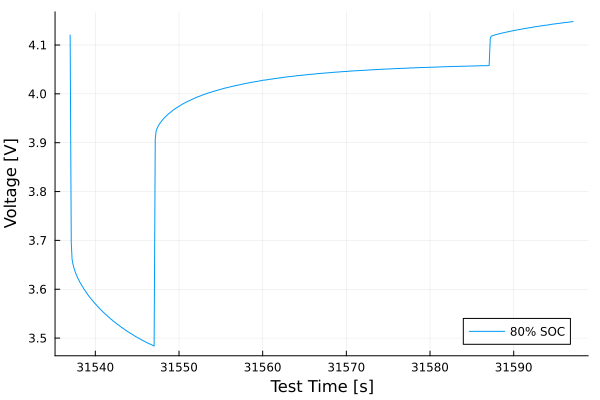

In [42]:
plt = plot(hppc_80[5:end, "Test_Time(s)"], hppc_80[5:end,"Voltage(V)"], xlabel = "Test Time [s]", ylabel = "Voltage [V]", label = "80% SOC")